In [1]:
from keras.preprocessing.image import img_to_array
from keras.models import load_model
import numpy as np
import imutils
import cv2

Using TensorFlow backend.


In [4]:
cascade = "haarcascade_frontalface_default.xml"
model = "lenet.hdf5" 
video = "smile_test.mp4"

In [5]:
# load the face detector cascade and smile detector CNN
detector = cv2.CascadeClassifier(cascade)
model = load_model(model)


camera = cv2.VideoCapture(video)

In [6]:
while True:
	# grab the current frame
	(grabbed, frame) = camera.read()

	# if we are viewing a video and we did not grab a frame, then we
	# have reached the end of the video
	if video and not grabbed:
		break

	# resize the frame, convert it to grayscale, and then clone the
	# original frame so we can draw on it later in the program
	frame = imutils.resize(frame, width=300)
	gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
	frameClone = frame.copy()

	# detect faces in the input frame, then clone the frame so that
	# we can draw on it
	rects = detector.detectMultiScale(gray, scaleFactor=1.1, 
		minNeighbors=5, minSize=(30, 30),
		flags=cv2.CASCADE_SCALE_IMAGE)

	# loop over the face bounding boxes
	for (fX, fY, fW, fH) in rects:
		# extract the ROI of the face from the grayscale image,
		# resize it to a fixed 28x28 pixels, and then prepare the
		# ROI for classification via the CNN
		roi = gray[fY:fY + fH, fX:fX + fW]
		roi = cv2.resize(roi, (28, 28))
		roi = roi.astype("float") / 255.0
		roi = img_to_array(roi)
		roi = np.expand_dims(roi, axis=0)

		# determine the probabilities of both "smiling" and "not
		# smiling", then set the label accordingly
		(notSmiling, smiling) = model.predict(roi)[0]
		label = "Smiling" if smiling > notSmiling else "Not Smiling"

		# display the label and bounding box rectangle on the output
		# frame
		cv2.putText(frameClone, label, (fX, fY - 10),
			cv2.FONT_HERSHEY_SIMPLEX, 0.45, (0, 0, 255), 2)
		cv2.rectangle(frameClone, (fX, fY), (fX + fW, fY + fH),
			(0, 0, 255), 2)

	# show our detected faces along with smiling/not smiling labels
	cv2.imshow("Face", frameClone)

	# if the 'q' key is pressed, stop the loop
	if cv2.waitKey(1) & 0xFF == ord("q"):
		break

# cleanup the camera and close any open windows
camera.release()
cv2.destroyAllWindows()

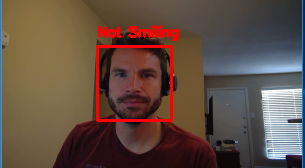

In [7]:
from IPython.display import Image
Image(filename='not_smiling.png')

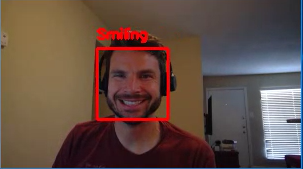

In [8]:
Image(filename='smiling.png')